# This is for the Data Toolkit session

In [18]:
# import np, pd and matplotlib and seaborn
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

In [19]:
df = pd.read_csv(
    r"C:\ZTalJaZ\Storage\MasterOfDataScience\Data-Sources\Data_Toolkits\Bank_Dataset\bank_marketing_updated_v1.csv",
    header=2, # or skiprows=2 for skipping the first two rows
    low_memory=False,
)

df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


## Data cleaning

### Fixing Rows, Columns

In [20]:
# Drop customerid column
df.drop(columns=["customerid"], inplace=True, axis=1)

df.head(3)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [21]:
# Divide the jobedu into 2 different columns: job and education

df[['job', 'education']] = df['jobedu'].str.split(',', expand=True) # expand=True creates new columns
df.drop(columns=["jobedu"], inplace=True, axis=1)

df.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


In [22]:
# Check for missing value
df['month'].isnull().sum()

np.int64(50)

In [23]:
# Divide the month and year into 2 different columns: month and year
df['year'] = df['month'].str.split(',', expand=True)[1]
df['month'] = df['month'].str.split(',', expand=True)[0]

df.head(5)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,year
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,261 sec,1,-1,0,unknown,no,management,tertiary,2017
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,151 sec,1,-1,0,unknown,no,technician,secondary,2017
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,2017
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,92 sec,1,-1,0,unknown,no,blue-collar,unknown,2017
4,33.0,0,1,single,no,no,no,no,unknown,5,may,198 sec,1,-1,0,unknown,no,unknown,unknown,2017


### Impute/Remove Missing Values

In [24]:
# Handling missing values
df['age'].isnull().sum()

np.int64(20)

In [25]:
float(100*20/df.shape[0]) # 20% of the data is missing

0.04423702196368141

In [26]:
# Drop records with missing age
ageNotNull = df[~df['age'].isnull()].copy() # this remove all the records with missing age

ageNotNull.shape

(45191, 20)

In [27]:
# Handling missing values in month

# Find numbers of missing data in month
df['month'].isnull().sum()

np.int64(50)

In [28]:
df['month'].value_counts(normalize=True) # check the distribution of month values

month
may    0.304400
jul    0.152521
aug    0.138172
jun    0.118133
nov    0.087863
apr    0.064901
feb    0.058590
jan    0.031044
oct    0.016342
sep    0.012754
mar    0.010540
dec    0.004739
Name: proportion, dtype: float64

In [29]:
# Fill the missing values with the most frequent value
df['month'].fillna(df['month'].mode()[0], inplace=True) # fillna with the most frequent value
df['month'].isnull().sum() # check if there are still missing values in month

C:\Users\ttcha\AppData\Local\Temp\ipykernel_2180\705224384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['month'].fillna(df['month'].mode()[0], inplace=True) # fillna with the most frequent value


np.int64(0)

In [30]:
df['pdays'].describe()
# there are many -1 values in pdays, which means that there is no contact with the customer, so we can drop these records(missing values)

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<b>Remenber our objective!</b>
- Ignores the missing values in calcualtions
- Simply make it missing (replace -1 with NaN)
- all summary statistics (mean, median, etc.) will ignore the missing values

In [31]:
# Replace -1 with NaN

# Method 1: using replace method
# df['pdays'].replace(-1, np.nan, inplace=True) # replace -1 with NaN

# Method 2: using loc method
df.loc[df['pdays'] < 0, 'pdays'] = np.nan # replace -1 with NaN
df['pdays'].describe() # check the distribution of pdays values

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Handling Outliers

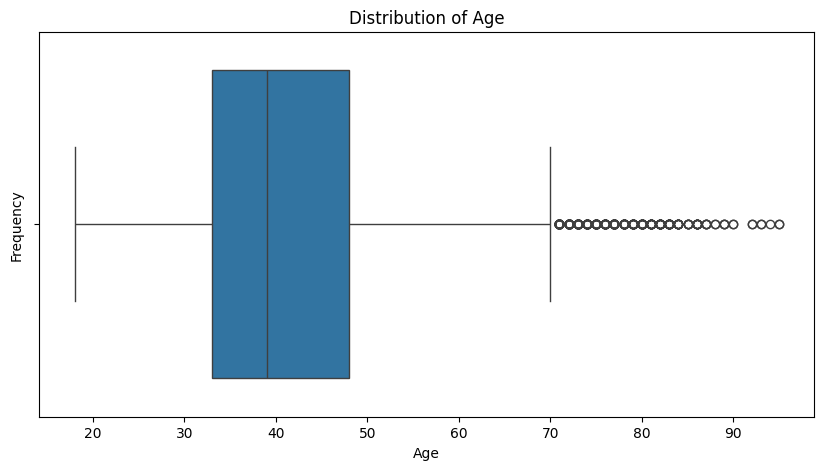

In [32]:
# Identify the outlliers (Age variable)

# df['age'].describe() # check the distribution of age values

# Check the distribution of age values by diagram
plt.figure(figsize=(10, 5))
# using boxplot to check the distribution of age values
sns.boxplot(x=df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Balance variable
df['balance'].describe() # check the distribution of balance values

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

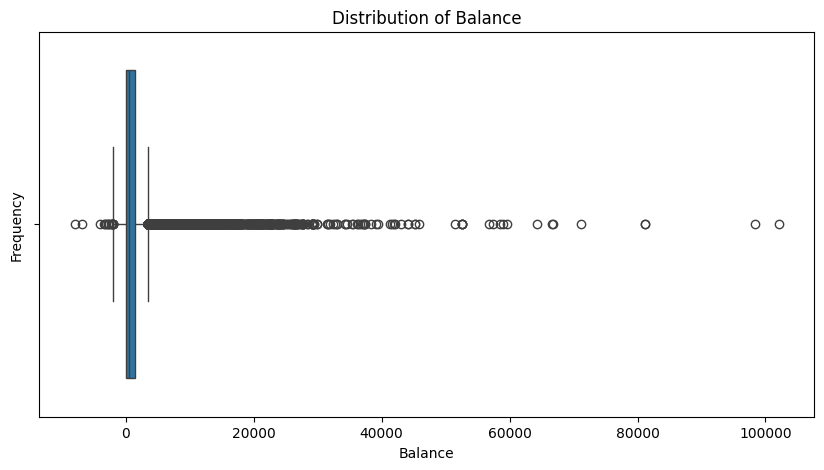

In [34]:
# Using boxplot to check the distribution of balance values
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['balance'])
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [35]:
# find quantiles of balance values
df['balance'].quantile([0.50, 0.75, 0.90, 0.95, 0.99]) # check the distribution of balance values

0.50      448.0
0.75     1428.0
0.90     3574.0
0.95     5768.0
0.99    13164.9
Name: balance, dtype: float64

### Standardize variable

In [36]:
# duration variable
df['duration'].describe() # check the distribution of duration values

count       45211
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [37]:
# standardize the duration variable
# change min to seconds using apply method to plit the str
# run one
# df['duration'] = df['duration'].apply(lambda x: float(x.split()[0]) / 60 if 'sec' in x else float(x.split()[0])) # convert to seconds

df['duration'].head() # check the distribution of duration values

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

## Univariate analysis - Categorical feature

In [38]:
df['marital'].value_counts(normalize=True) # check the distribution of matial values

marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64

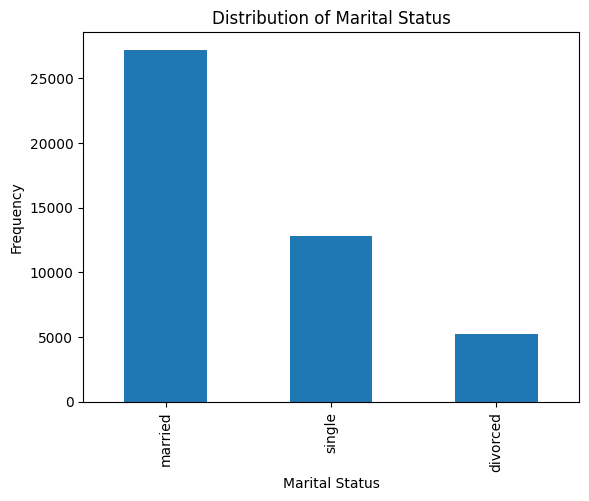

In [39]:
df['marital'].value_counts().plot.bar() # check the distribution of matial values
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

## Categorical Ordered Univariate Analysis

In [40]:
df['education'].value_counts(normalize=True) # check the distribution of education values

education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of Education'}, ylabel='proportion'>

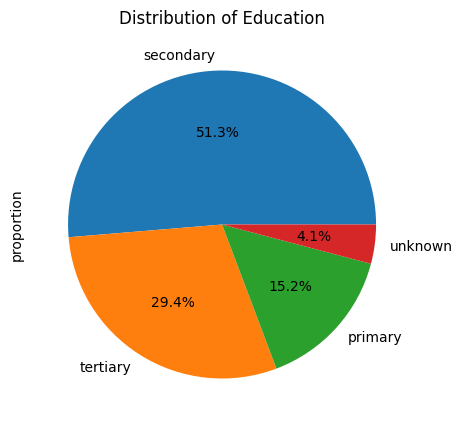

In [41]:
df['education'].value_counts(normalize=True).plot.pie(
    figsize=(10, 5),
    autopct='%1.1f%%',
    title='Distribution of Education',
    legend=False,
)

## Bivariate and multivariate

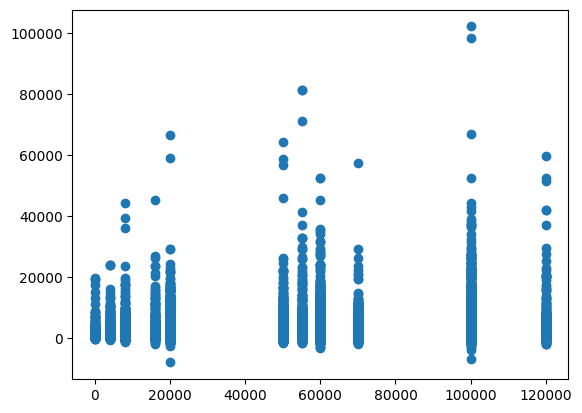

In [42]:
# Numerical - Numerical

plt.scatter(df['salary'], df['balance'])

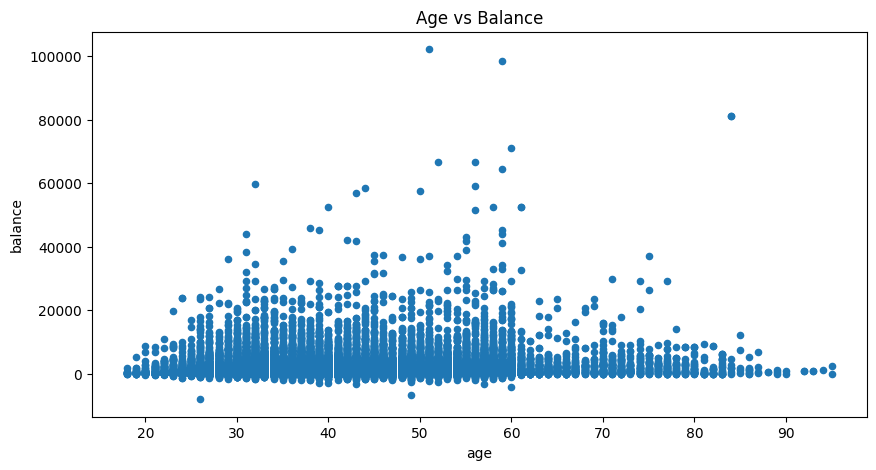

In [43]:
df.plot.scatter(x='age', y='balance', figsize=(10, 5), title='Age vs Balance')
plt.show()

In [44]:
# quantify using correlation
corData = df[['age', 'salary','balance']].corr() # check the correlation between age and balance

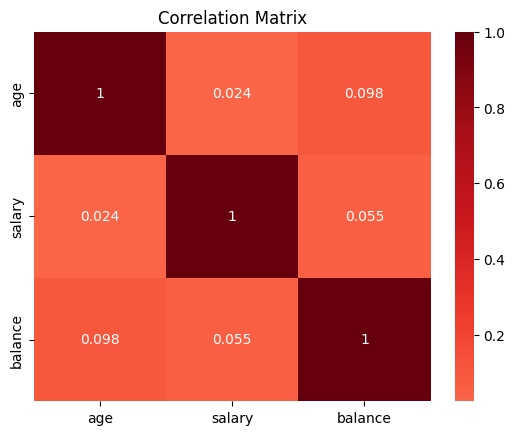

In [45]:
sns.heatmap(data=corData, annot=True, cmap='Reds', center=0)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='response', ylabel='salary'>

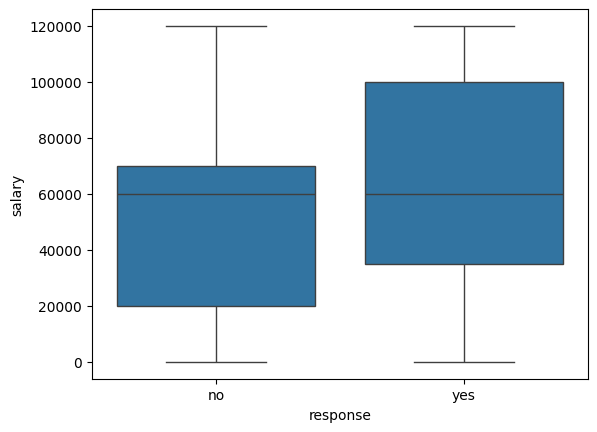

In [46]:
sns.boxplot(data=df, x="response", y="salary")

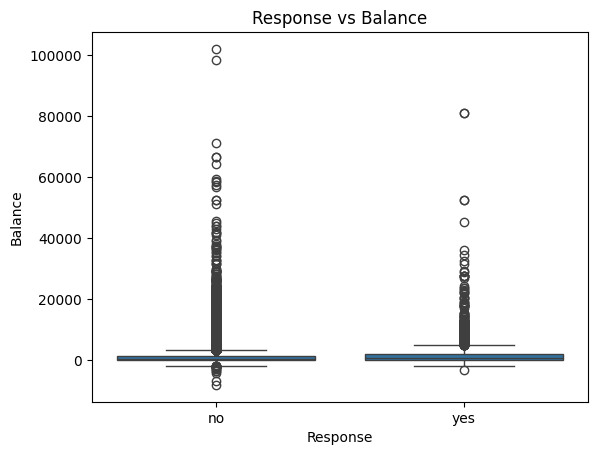

In [47]:
# Response vs balance
sns.boxplot(data=df, x="response", y="balance")
plt.title('Response vs Balance')
plt.xlabel('Response')
plt.ylabel('Balance')
plt.show()

In [48]:
df.groupby('response')['balance'].mean() # check the mean of balance by response

response
no     1304.094525
yes    1804.832041
Name: balance, dtype: float64

In [49]:
df.groupby('response')['balance'].median() # check the median of balance by response

response
no     417.0
yes    733.0
Name: balance, dtype: float64

## Catergorical - Catergorical

In [50]:
df['response_flag'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0) # create a new column response_flag

In [51]:
df['response_flag'].value_counts(normalize=True) # check the distribution of response_flag values

response_flag
0    0.883059
1    0.116941
Name: proportion, dtype: float64

In [54]:
# Education vs response rate

df.groupby('education')['response_flag'].mean() # check the mean of response_flag by education

education
primary      0.086265
secondary    0.105551
tertiary     0.149989
unknown      0.135703
Name: response_flag, dtype: float64

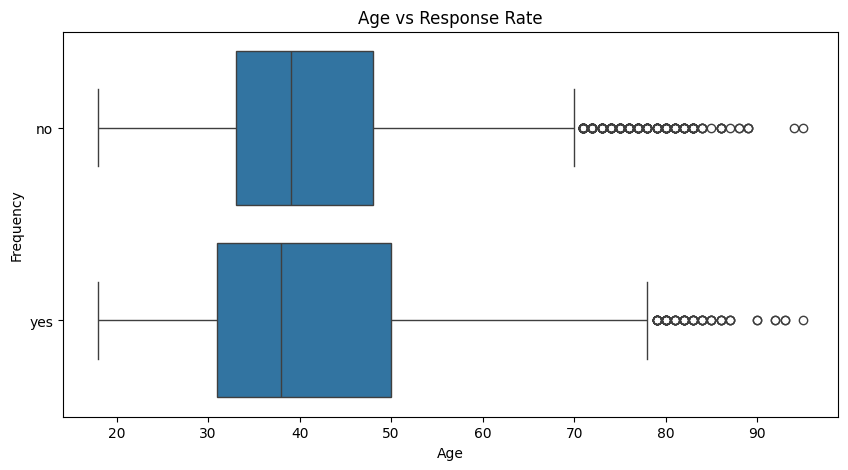

In [58]:
# Age and response
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='age', y='response')
plt.title('Age vs Response Rate')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Macking buckets from age column
df['age_bucket'] = pd.cut(
    df["age"],
    bins=[0, 20, 30, 40, 50, 60, 70, 80],
    labels=["0-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"],
)  # create buckets from age column

In [64]:
df['age_bucket'].value_counts(normalize=True).sort_values(ascending=False) # check the distribution of age_bucket values

age_bucket
30-40    0.392065
40-50    0.249157
50-60    0.178768
20-30    0.153708
60-70    0.015546
70-80    0.008605
0-20     0.002151
Name: proportion, dtype: float64

C:\Users\ttcha\AppData\Local\Temp\ipykernel_2180\367417106.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bucket')['response_flag'].mean().plot.bar() # check the mean of response_flag by age_bucket


<Axes: xlabel='age_bucket'>

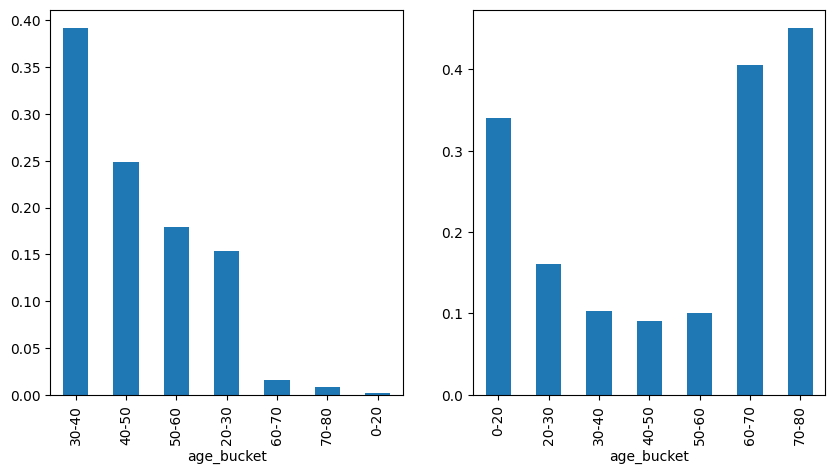

In [70]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['age_bucket'].value_counts(normalize=True).plot.bar()
plt.subplot(1, 2, 2)
df.groupby('age_bucket')['response_flag'].mean().plot.bar() # check the mean of response_flag by age_bucket

## Multivariate

In [75]:
pivot_table = pd.pivot_table(
  data=df,
  index='education',
  columns='marital',
  values='response_flag',
)

<Axes: xlabel='marital', ylabel='education'>

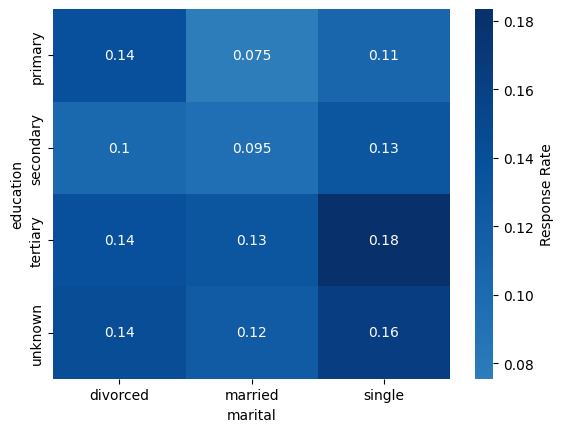

In [77]:
sns.heatmap(
  pivot_table,
  annot=True,
  cmap='Blues',
  center=0,
  cbar_kws={"label": "Response Rate"},
)